In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
data = pd.read_csv('Google_Stock_Price_Train.csv')

data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [30]:
training_data = data.iloc[:, 1:2].values  # Selecting 'Open' column
scaler = MinMaxScaler(feature_range=(0, 1))
training_data_scaled = scaler.fit_transform(training_data)


In [31]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 60  # Length of input sequences
X_train, y_train = create_sequences(training_data_scaled, sequence_length)

# Reshape input data for LSTM [samples, time steps, features]
X_train = X_train.reshape(-1, sequence_length, 1)


In [32]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Add dropout regularization
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))  # Add dropout regularization
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
38/38 [==============================] - 7s 57ms/step - loss: 0.0292
Epoch 2/20
38/38 [==============================] - 2s 58ms/step - loss: 0.0045
Epoch 3/20
38/38 [==============================] - 2s 57ms/step - loss: 0.0043
Epoch 4/20
38/38 [==============================] - 3s 83ms/step - loss: 0.0037
Epoch 5/20
38/38 [==============================] - 2s 59ms/step - loss: 0.0033
Epoch 6/20
38/38 [==============================] - 2s 60ms/step - loss: 0.0035
Epoch 7/20
38/38 [==============================] - 3s 67ms/step - loss: 0.0037
Epoch 8/20
38/38 [==============================] - 2s 58ms/step - loss: 0.0033
Epoch 9/20
38/38 [==============================] - 3s 78ms/step - loss: 0.0032
Epoch 10/20
38/38 [==============================] - 2s 63ms/step - loss: 0.0031
Epoch 11/20
38/38 [==============================] - 2s 54ms/step - loss: 0.0030
Epoch 12/20
38/38 [==============================] - 2s 57ms/step - loss: 0.0028
Epoch 13/20
38/38 [==================

In [33]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
test_data = test_data.iloc[:, 1:2].values

In [34]:
X_test = []
for i in range(sequence_length, len(inputs)):
    X_test.append(inputs[i-sequence_length:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [35]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


In [36]:
X_train_reshaped = X_train.reshape(-1, X_train.shape[1])  # Flatten the last dimension
X_train_original_scale = scaler.inverse_transform(X_train_reshaped)

print("Original scale of input features:", X_train_original_scale)
print("Predicted stock prices:", predicted_stock_price)


Original scale of input features: [[325.25 331.27 329.83 ... 321.3  322.31 324.8 ]
 [331.27 329.83 328.34 ... 322.31 324.8  325.5 ]
 [329.83 328.34 322.04 ... 324.8  325.5  324.66]
 ...
 [774.25 776.03 779.31 ... 792.36 790.9  790.68]
 [776.03 779.31 779.   ... 790.9  790.68 793.7 ]
 [779.31 779.   779.66 ... 790.68 793.7  783.33]]
Predicted stock prices: [[782.1107 ]
 [780.6942 ]
 [779.6664 ]
 [778.7764 ]
 [778.6276 ]
 [779.64935]
 [781.4153 ]
 [783.3578 ]
 [785.4342 ]
 [787.47546]
 [789.33374]
 [790.873  ]
 [792.06683]
 [793.07794]
 [793.9212 ]
 [795.56635]
 [798.03827]
 [801.3821 ]
 [804.8408 ]
 [806.87036]]


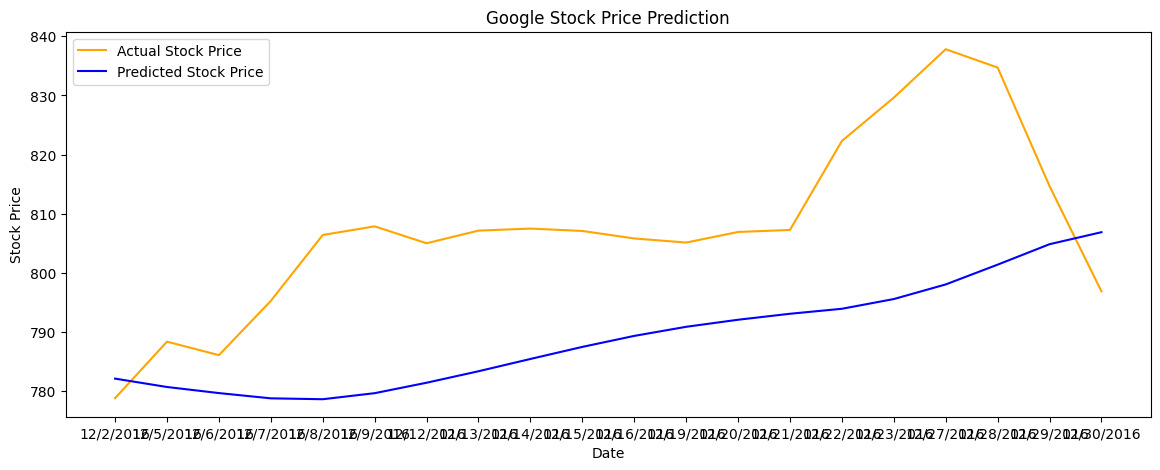

In [40]:
plt.figure(figsize=(14,5))
plt.plot(data['Date'].iloc[-len(test_data):], test_data, color='orange', label='Actual Stock Price')
plt.plot(data['Date'].iloc[-len(test_data):], predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()